<a href="https://colab.research.google.com/github/huavanson/gittest-/blob/master/Image_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import sys
from google.colab import files
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.io import imread, imshow
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import os

In [39]:
path = '/content/Untitled Folder/'
filenames=os.listdir(path)

In [ ]:
input_shape=(224,224,3)
vgg = VGG16(input_shape=input_shape, include_top=False, weights="imagenet",pooling="avg")
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

In [21]:
feature_list = []
for imgpath in filenames:
    x = load_img(path+"/"+imgpath,target_size=(224,224)) #resize ảnh về 224,224 
    img_array = img_to_array(x) # chuyển ảnh về ma trận có shape 224*224*3
    img_array = np.expand_dims(img_array, axis=0)# thêm chiều cho ma trận 
    img_array = imagenet_utils.preprocess_input(img_array) # loại bỏ các pixel RGB
    features = vgg.predict(img_array)# encoding
    features = features.reshape(512) # reshape (,512)
    feature_list.append(features)# thêm các feature đã được rút trích vào một mảng 


In [23]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2, metric='cosine') # n_neighbors = 2 => 2 ảnh giống ảnh input nhất
neigh.fit(feature_list)

#(distance, found_index) = neigh.kneighbors([tfidf_matrix[-1]])
#result = new_df.iloc[found_index.tolist()[0]]


NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [69]:
# preprocess ảnh input về cùng dạng vector trong dataset
res_list = []
path_new_img = '/content/176765018_2809950522585998_7107457396647702013_n.jpg'
new_img = load_img(path_new_img,target_size=(224,224))
new_vec = img_to_array(new_img)
new_vec = np.expand_dims(new_img, axis=0)
new_vec = imagenet_utils.preprocess_input(new_vec)
res_vec = vgg.predict(new_vec)
res_vec = res_vec.reshape(512)
res_list.append(res_vec)

In [70]:
(distance , index ) = neigh.kneighbors(res_list) 
index = index.tolist()

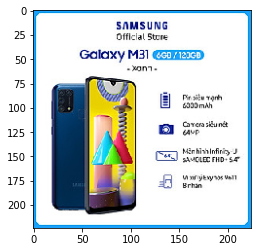

In [71]:
plt.imshow(new_img) # ảnh input 

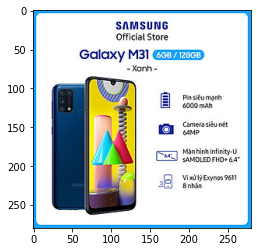

In [72]:
im = load_img(path+filenames[index[0][0]])
im2 = load_img(path+filenames[index[0][1]])
plt.imshow(im) # ảnh kết quả thứ 1

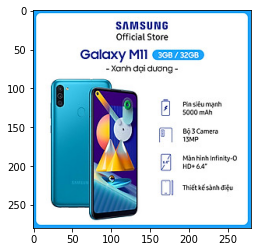

In [73]:
plt.imshow(im2) # ảnh kết quả thứ 2